In [1]:
from feynml.feynmandiagram import FeynmanDiagram
from feynml.feynml import FeynML, Head, Meta
from feynml.leg import Leg
from feynml.momentum import Momentum
from feynml.propagator import Propagator
from feynml.vertex import Vertex

In [2]:
v1 = Vertex()
v2 = Vertex()

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(pdgid=21).connect(v1,v2),
    Leg(pdgid=1).with_target(v1).with_incoming(),
    Leg(pdgid=-1).with_target(v1).with_incoming(),
    Leg(pdgid=2).with_target(v2).with_outgoing(),
    Leg(pdgid=-2).with_target(v2).with_outgoing(),
    
)

/home/apn/git/pyfeyn2/pyfeyn2/render/text/ascii.py:16: UserWarning: colorama and termcolor are required for colored ASCII rendering
  warn("colorama and termcolor are required for colored ASCII rendering")


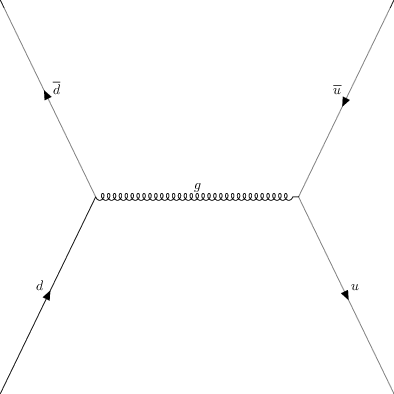

In [3]:
fd

In [4]:
from feynmodel.interface.ufo import load_ufo_model
fm = load_ufo_model("ufo_sm")

In [5]:
fm.vertices[0].particles[0].pdg_code

250

In [6]:
fd.get_connections(v1)

[Propagator(id='Propagator11', pdgid=21, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, source='Vertex8', target='Vertex9'),
 Leg(id='Leg12', pdgid=1, name='d', type='fermion', particle=<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target='Vertex8', x=None, y=None, z=None, sense='incoming', external=None),
 Leg(id='Leg13', pdgid=-1, name='d~', type='anti fermion', particle=<Particle: name="d~", pdgid=-1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=None, target='Vertex8', x=None, y=None, z=None, sense='incoming', external=None)]

In [7]:
import feynpy as fp

In [8]:
vv2 = fp.find_vertex_in_model(fd,v2,fm)

In [9]:
vv1 = fp.find_vertex_in_model(fd,v1,fm)

In [10]:
vv1.color

['T(3,2,1)']

In [11]:
vv1.couplings

{(0, 0): GC_11}

In [12]:
vv1.particles[0].color

-3

In [13]:
fp.get_vertex_math(fd,v1,fm)

[('complex(0,1)*G',
  'T(Glu(Propagator11),Col(Leg12),Col(Leg13))',
  'Gamma(Mu(Propagator11),Spin(Leg12),Spin(Leg13))')]

In [14]:
fp.get_vertex_math(fd,v2,fm)

[('complex(0,1)*G',
  'T(Glu(Propagator11),Col(Leg14),Col(Leg15))',
  'Gamma(Mu(Propagator11),Spin(Leg14),Spin(Leg15))')]

In [15]:
cfd = fd.conjugated()
fp.get_vertex_math(cfd,cfd.vertices[0],fm)

[('complex(0,1)*G',
  'T(Glu(Propagator26),Col(Leg22),Col(Leg23))',
  'Gamma(Mu(Propagator26),Spin(Leg22),Spin(Leg23))')]

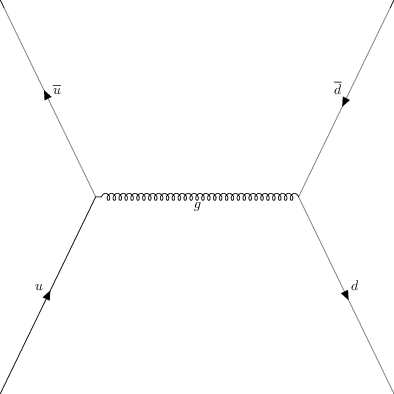

In [16]:
cfd

In [17]:
fp.get_propagator_math(fd,fd.propagators[0],fm)

'D(Propagator11,ZERO)'

In [18]:
fp.feynman_diagram_to_string(fd,fm)

'complex(0,1)*G*T(Glu(Propagator11),Col(Leg12),Col(Leg13))*Gamma(Mu(Propagator11),Spin(Leg12),Spin(Leg13)) * complex(0,1)*G*T(Glu(Propagator11),Col(Leg14),Col(Leg15))*Gamma(Mu(Propagator11),Spin(Leg14),Spin(Leg15)) * U(Spin(Leg12),Mom(Leg12)) * V(Spin(Leg13),Mom(Leg13)) * U_bar(Spin(Leg14),Mom(Leg14)) * V_bar(Spin(Leg15),Mom(Leg15)) * D(Propagator11,ZERO)'

In [19]:
fp.feynman_diagram_to_string(cfd,fm)

'complex(0,1)*G*T(Glu(Propagator26),Col(Leg22),Col(Leg23))*Gamma(Mu(Propagator26),Spin(Leg22),Spin(Leg23)) * complex(0,1)*G*T(Glu(Propagator26),Col(Leg24),Col(Leg25))*Gamma(Mu(Propagator26),Spin(Leg24),Spin(Leg25)) * U_bar(Spin(Leg22),Mom(Leg22)) * V_bar(Spin(Leg23),Mom(Leg23)) * U(Spin(Leg24),Mom(Leg24)) * V(Spin(Leg25),Mom(Leg25)) * D(Propagator26,ZERO)'